In [1]:
import pandas as pd
import EDA
import preprocessing
import classification

column_credit = ['CustomerID', 'CheckingAccountBalance', 'DebtsPaid', 'SavingsAccountBalance',
                 'CurrentOpenLoanApplications']
df_credit = pd.read_csv('ds-credit.tsv', sep='\s+', header=-1, names=column_credit)

column_app = ['CustomerID', 'LoanPayoffPeriodInMonths', 'LoanReason', 'RequestedAmount', 'InterestRate',
              'Co-Applicant']
df_app = pd.read_csv('ds-app.tsv', sep='\s+', header=-1, names=column_app)

column_borrower = ['CustomerID', 'YearsAtCurrentEmployer', 'YearsInCurrentResidence', 'Age', 'RentOrOwnHome',
                   'TypeOfCurrentEmployment', 'NumberOfDependantsIncludingSelf']
df_borrower = pd.read_csv('ds-borrower.csv', sep='\s+', index_col=False, names=column_borrower, header=0)

column_result = ['CustomerID', 'WasTheLoanApproved']
df_result = pd.read_csv('ds-result.tsv', sep='\s+', header=-1, names=column_result)
df_result = df_result.drop_duplicates()  # Drop the duplicated results

In [2]:
na = preprocessing.NA(df_borrower)
na.to_num('CustomerID')
df_borrower = na.drop('CustomerID')

na = preprocessing.NA(df_result)
na.to_num('CustomerID')
df_result = na.drop('CustomerID')

mg = preprocessing.Merge([df_credit, df_app, df_borrower, df_result])
df_all = mg.transform('CustomerID')
df = df_all.loc[(df_all.WasTheLoanApproved == 'Y') | (df_all.WasTheLoanApproved == 'N')].dropna()
df['Age'] = pd.to_numeric(df.Age)
df = preprocessing.Encode().ordinal(df)

In [3]:
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1:].values.reshape(-1,1)

In [4]:
lr = classification.Lr(x, y)
lr.fit()

Train set accuracy:
0.7055961070559611
Test set accuracy:
0.7184466019417476


/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
lr = classification.rf(x, y)
lr.fit()

Train set accuracy:
0.9878345498783455
Test set accuracy:
0.7378640776699029


/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/tianyi/Documents/data_practice/LoanRisk/classification.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(self.xtr, self.ytr)


/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tianyi/anaconda3/envs/in

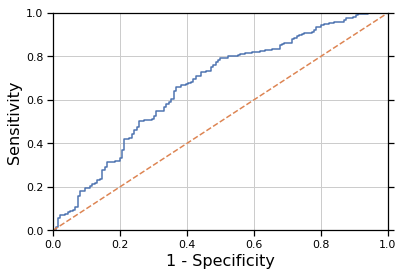

0.6640641711229947


In [5]:
classification.Roc(lr.model).plot(lr.xtr, lr.ytr)

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


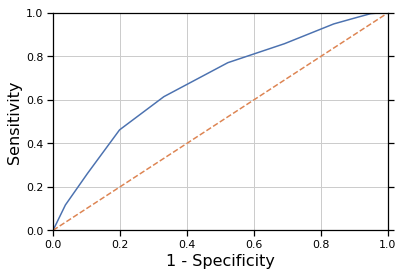

0.68225935828877


In [6]:
classification.Roc(lr.model, 'predict_proba').plot(lr.xtr, lr.ytr)

In [7]:
na = preprocessing.NA(df_borrower)
na.to_num('CustomerID')
df_borrower = na.drop('CustomerID')

na = preprocessing.NA(df_result)
na.to_num('CustomerID')
df_result = na.drop('CustomerID')

mg = preprocessing.Merge([df_credit, df_app, df_borrower, df_result])
df_all = mg.transform('CustomerID')
df = df_all.loc[(df_all.WasTheLoanApproved == 'Y') | (df_all.WasTheLoanApproved == 'N')]
df['Age'] = pd.to_numeric(df.Age)

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [8]:
na = preprocessing.NA(df)
df = na.replace()

In [9]:
df = preprocessing.Encode().ordinal(df)

In [10]:
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1:].values.reshape(-1,1)

In [12]:
lr = classification.rf(x, y)
lr.fit()

Train set accuracy:
0.9882943143812709
Test set accuracy:
0.66


/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/tianyi/Documents/data_practice/LoanRisk/classification.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(self.xtr, self.ytr)
